### RFC

### import modules and configure notebook

In [1]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from archeo_functions import myModel

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
%matplotlib inline

/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Load variables stored by data_preproccessing notebook

In [2]:
%store -r train_data_formodel
%store -r test_data
%store -r my_data
%store -r uniques
%store -r best_feats
%store -r X_test_labeled_df
%store -r site_frequencies_df



### configurations
* save_plots -> True|False
* random_seed_state -> number, sets random state for model and for stratified splits 
* classify_bedrock_only -> True|False
* pickle_model -> True|False, wether model should be serialised and saved
* pickle_model_name -> string, name of serialised model
* grid_search -> True|False, if set to true then grid search is performed to identify optimum hyperparamaters for model 
* scale -> True|False if set to True then features scaled to all have mean value 0 and standard deviation 1
* pickle_file_path -> string,  filepath for serialised model to be saved to
* modelName -> string, type of model to use 'rfc'|'gbm'|'svm'|'knn'
* trainTestSplitTotalIters -> total number of iterations of train test split for cross validation

In [3]:
save_plots = True
random_seed_state = 42
classify_bedrock_only = False
grid_search = False
scale = True
save_predictions = False
modelName = 'gbm'


### if only bedrock sites are classified then classes are label encoded, if bedrock sites alone are not being classified then the class sites would have already been label encoded in the 1 data_preproccessing notebook 

if classify_bedrock_only:
    train_data_formodel['class'], uniques = pd.factorize(train_data_formodel['class'])
    train_data_formodel = train_data_formodel[train_data_formodel['Geology']=='Bedrock']

### counts of instances in all classes before oversampling

In [4]:
train_data_formodel['class'].value_counts()

4     105
17    100
18     61
0      53
10     47
13     45
15     36
16     36
2      36
12     30
11     30
8      30
7      30
5      30
6      27
9      27
1      24
14     21
3      18
Name: class, dtype: int64

In [5]:
train_data_formodel['class'].head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

### The class column is stored as the variable y 

In [6]:
y = np.array(train_data_formodel['class'])

### The variables identified as best by the 2 feature_selection notebook are used as features

In [7]:
train_data_feats = train_data_formodel[best_feats]

### address class imbalance using synthetic minority oversampling technique (SMOTE) algorithm

In [8]:
if scale:
    my_scaler = StandardScaler()
    X = np.array(my_scaler.fit_transform(np.array(train_data_feats)))
else:
    X = np.array(np.array(train_data_feats))

### the dimensions of the class and features are checked

In [9]:
print(X.shape)
print(y.shape)

(786, 25)
(786,)


### Carry out 10-f0ld stratified cross validation, class f1 scores and macro f1 scores are calculated

In [10]:
my_model = myModel(X, y)

In [11]:
my_model.evaluate_svm()

making model:
1
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.2s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 

gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
2
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.6s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
3
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.3s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
4
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.8s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
5
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.6s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
6
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.8s finished


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
7
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
8
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.8s finished


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
9
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation
making model:
10
running grid search on this training data fold
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.6s


gridsearch identified optimum paramaters for the current training data fold, now model with optimumn
                      paramaters predicting using test_data for evaluation


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.4s finished
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
mis

NameError: name 'mis' is not defined

In [ ]:
if modelName == 'svm':
    skf = StratifiedKFold(n_splits=10, random_state=random_seed_state)

    class_f1_scores = []
    macro_f1_scores = []
    accuracy_scores = []
    feat_imp =[]
    f1_dict = {}
    feat_imp_dict = {}
    count = 0

  
    for train_index, test_index in skf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index] 
        
        count = count + 1
        print('making model:')
        key = 'round' + str(count)
        print(count)
        X_post_smote, y_post_smote = SMOTE(random_state=42).fit_sample(X_train, y_train)


        ###this section optimises model paramaters by gridsearch 

        esti = SVC()


        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100], 
            'class_weight':['balanced', None], 
            'gamma':[0.001, 0.01, 0.1, 1, 10]
                }

        clf = GridSearchCV(estimator = esti, param_grid= param_grid,
                                  n_jobs=-1, scoring='f1_macro', cv = 5, verbose=3)
        print('running grid search on this training data fold')
        clf.fit(X_post_smote, y_post_smote)
        optimumEstimator = clf.best_estimator_
        optimumEstimator.fit(X_post_smote, y_post_smote)
        print('gridsearch identified optimum paramaters for the current training data fold, now model with optimumn paramaters predicting using test_data for evaluation')

        y_pred = optimumEstimator.predict(X_test)
        class_f1_scores = f1_score(y_test, y_pred, average = None)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        macro_f1_scores.append(f1_score(y_test, y_pred, average = 'macro'))
        f1_dict[key] = class_f1_scores 
        #feat_imp_dict[key] = optimumEstimator.feature_importances_

In [15]:
f1_df = pd.DataFrame(data = my_model.f1_dict)


In [16]:
for key in my_model.f1_dict:
    print(len(my_model.f1_dict[key]))

19
19
19
19
19
19
19
19
19
19


### Below are the encodings for the class variable

In [17]:
print(train_data_formodel['class'].unique())
print(list(uniques))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
['FH', 'ER', 'WW', 'TC', 'CS', 'BC', 'KQ', 'AR', 'SL', 'FG', 'WB_BX', 'PF', 'BM', 'WH', 'SQ', 'WN', 'BH', 'PH', 'LB']


In [18]:
f1_df_final = pd.concat([f1_df, pd.Series(uniques)], axis = 1)

In [19]:
f1_df_final.rename(columns={0:'class'}, inplace=True)
f1_df_final.set_index('class', drop = True, inplace = True)

### Boxplot showing the distribution of class f1 scores from 10 models

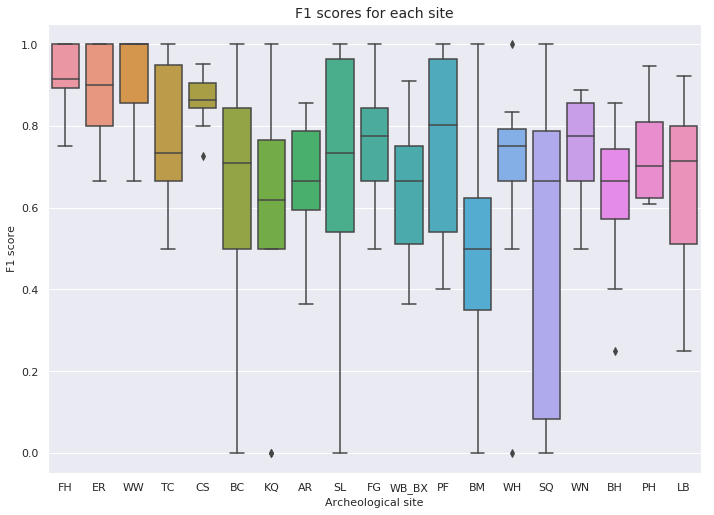

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.boxplot(data = f1_df_final.T)
plot.set_title('F1 scores for each site', fontdict={'fontsize': 14})
plot.set_ylabel('F1 score', fontdict={'fontsize': 11})
plot.set_xlabel("Archeological site", fontdict={'fontsize': 11})

if save_plots:
    fig = plot.get_figure()
    fig.savefig('figures/site_specific_f1_scores.png')

In [21]:
if save_plots:
    pd.DataFrame(data = f1_df_final.T.median()).to_csv('figures/median_class_f1_scores.csv')

### Boxplot showing the macro F1 score

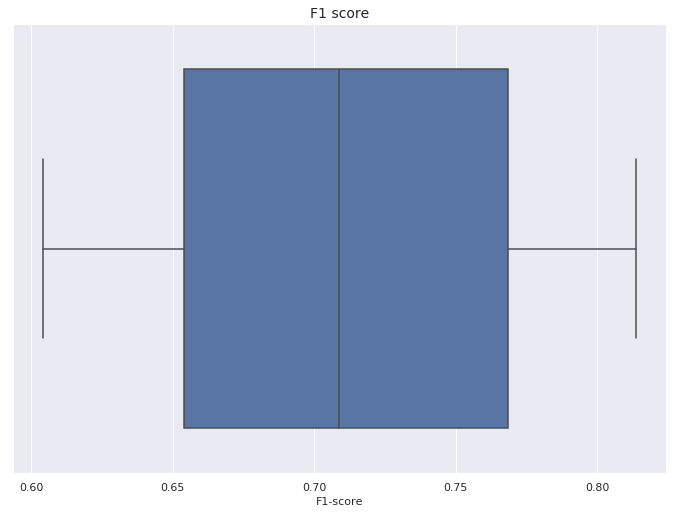

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.boxplot(my_model.macro_f1_scores)
plot.set_title('F1 score', fontdict={'fontsize': 14})
plot.set_xlabel("F1-score", fontdict={'fontsize': 11})

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig('figures/average-weighted f1_scores.png')

In [23]:
if save_plots:
    pd.Series(pd.Series(my_model.macro_f1_scores).median()).to_csv('figures/median_macro_f1.csv')

In [24]:
pd.Series(my_model.macro_f1_scores).median()

0.7089165225703515

### Boxplot showing accuracy scores

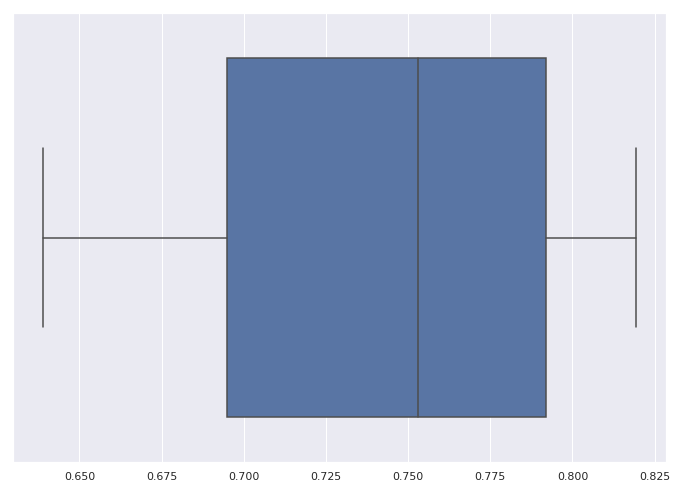

In [25]:
sns.boxplot(my_model.accuracy_scores)

### Get feature importances

In [26]:
feat_imp_df = pd.DataFrame(data = myModel.feat_imp_dict)
feat_imp_df.head()

AttributeError: type object 'myModel' has no attribute 'feat_imp_dict'

In [ ]:
feat_imp_df_final = pd.concat([feat_imp_df, pd.Series(my_data[best_feats].columns.values)], axis = 1)
feat_imp_df_final.rename(columns = {0:'element'}, inplace = True )
feat_imp_df_final.head()

In [ ]:
feat_imp_df_final.set_index('element', inplace=True)


In [ ]:
feat_imp_df_final_plot = feat_imp_df_final.T

In [ ]:
feat_imp_df_final_plot

elements = feat_imp_df_final_plot.columns.values 
mean_feature_importance = []
for col in list(feat_imp_df_final_plot.columns.values):
    mean_feature_importance.append(feat_imp_df_final_plot[col].mean())
    

In [ ]:
mean_feature_importance_df = pd.concat([pd.Series(elements), pd.Series(mean_feature_importance)], axis = 1)

In [ ]:
mean_feature_importance_df.rename(columns={0:'elements', 1:'mean_importance'}, inplace=True)

In [ ]:
mean_feature_importance_df.sort_values(by='mean_importance', ascending=False, inplace=True)

In [ ]:
ordered_col_names = list(mean_feature_importance_df['elements'])

In [ ]:
sns.set_style("whitegrid")
sns.set_style()
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.boxplot(data = feat_imp_df_final_plot[ordered_col_names])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90, ha = 'left')
plot.set_title('Feature (element) importance', fontdict={'fontsize': 20})
plot.set_ylabel('Feature importance', fontdict={'fontsize': 15})
plot.set_xlabel("Element", fontdict={'fontsize': 15})

if save_plots:
    fig = plot.get_figure()
    fig.savefig('figures/feature_importances.png')

### show relationship between sample size and class F1 scores

In [37]:
site_frequencies_df.head()

,class,Number of Observations
0,CS,105
1,PH,102
2,Pimple,78
3,LB,61
4,FH,54


In [28]:
site_frequencies_df.rename(columns = {'Site':'class'}, inplace=True)

In [29]:
f1_scores_for_plot = f1_df_final.reset_index(drop = False)

In [30]:
f1_scores_for_plot['Mean F1 Score'] = f1_scores_for_plot.mean(axis = 1)

In [31]:
combined_df = site_frequencies_df.set_index('class').join(other = f1_scores_for_plot.set_index('class'), how = 'inner')

In [32]:
forPlot = combined_df.reset_index(drop = False).rename(columns = {'index':'class'})[['class', 'Number of Observations', 'Mean F1 Score']]

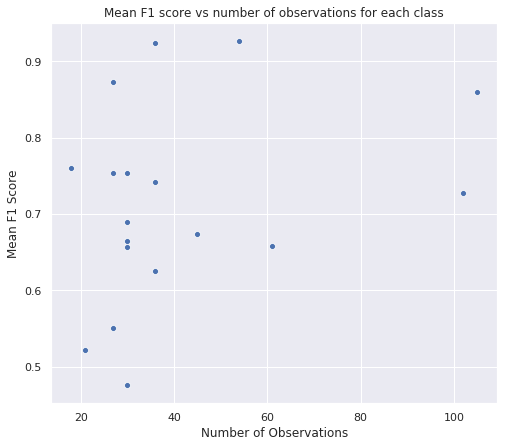

In [33]:
sns.set(rc={'figure.figsize':(8,7)})
plot = sns.scatterplot(x ='Number of Observations', y = 'Mean F1 Score', data = forPlot, ci=False)
ax = plt.gca()
ax.set_title("Mean F1 score vs number of observations for each class")
fig = plot.get_figure()
if save_plots:
    fig.savefig('figures/f1scoresvsnumberobservations{0}.png'.format(modelName))




In [34]:
forPlot

,class,Number of Observations,Mean F1 Score
0,CS,105,0.860169
1,PH,102,0.727171
2,LB,61,0.658044
3,FH,54,0.926904
4,WH,45,0.673590
5,WW,36,0.923810
6,BH,36,0.626061
7,WN,36,0.742085
8,SL,30,0.689048
9,BM,30,0.475714


In [35]:
f1_scores_for_plot.head()

,class,round1,round2,round3,round4,round5,round6,round7,round8,round9,round10,Mean F1 Score
0,FH,0.909091,1.000000,0.923077,1.000000,0.888889,0.888889,0.909091,0.750000,1.000000,1.000000,0.926904
1,ER,0.800000,1.000000,0.800000,1.000000,0.800000,0.666667,0.666667,1.000000,1.000000,1.000000,0.873333
2,WW,1.000000,0.857143,0.857143,1.000000,0.857143,0.666667,1.000000,1.000000,1.000000,1.000000,0.923810
3,TC,0.800000,0.500000,1.000000,0.500000,1.000000,0.666667,0.666667,0.800000,1.000000,0.666667,0.760000
4,CS,0.909091,0.909091,0.857143,0.846154,0.869565,0.800000,0.952381,0.727273,0.888889,0.842105,0.860169
